In [2]:
import numpy as np
import pandas as pd

In [26]:
rank= pd.Series(['ace', 2,3,4,5,6,7,8,9,10,'jack', 'queen','king'])
suit= pd.Series(['heart', 'spades', 'clubs', 'diamonds'])
deck= pd.merge(rank.to_frame(), suit.to_frame(), how='cross')
deck= pd.merge(rank.rename('rank').to_frame(), suit.rename('suit').to_frame(), how='cross')

deck

,rank,suit
0,ace,heart
1,ace,spades
2,ace,clubs
3,ace,diamonds
4,2,heart
5,2,spades
6,2,clubs
7,2,diamonds
8,3,heart
9,3,spades


In [29]:
def get_new_deck():
    rank= pd.Series(['ace', 2,3,4,5,6,7,8,9,10,'jack', 'queen','king'])
    suit= pd.Series(['heart', 'spades', 'clubs', 'diamonds'])
    deck= pd.merge(rank.rename('rank').to_frame(), suit.rename('suit').to_frame(), how='cross')
    return deck

get_new_deck
hand=deck.sample(2, replace=False)
hand

,rank,suit
14,4,clubs
37,10,spades


In [30]:
deck.drop(hand.index) #we want to drop the rows not the columns so we drop the index

,rank,suit
0,ace,heart
1,ace,spades
2,ace,clubs
3,ace,diamonds
4,2,heart
5,2,spades
6,2,clubs
7,2,diamonds
8,3,heart
9,3,spades


In [23]:
def draw_cards(n, deck):
    drawn= deck.sample(n,replace=False)
    deck = deck.drop(drawn.index)
    return drawn, deck

In [31]:
hand_size = 5
deck = get_new_deck()
while len(deck) > hand_size:
    hand, deck = draw_cards(hand_size,deck) #drawn and deck are the 2 outputs of this function
    print(len(deck))

deck

47
42
37
32
27
22
17
12
7
2


,rank,suit
2,ace,clubs
16,5,heart


In [ ]:
deck.set_index(['rank', 'suit'])

(2, 0)

In [ ]:
deck.set_index(['rank', 'suit']).shape

In [70]:
def score_hand(hand):
    score = 0
    aces = hand.loc[hand ['rank']=='ace']
    rest= hand.loc[hand ['rank'] != 'ace']

    for _i, card in rest.iterrows():
        if type(card['rank']) == int:
            score += card['rank']
        elif type(card['rank']) == str:
            score += 10

            for _i, card in aces.iterrows():
                if score +11 >21:
                    score+=1
                else:
                    score +=11
                    
    return score

In [39]:
hand

,rank,suit
11,3,diamonds
42,jack,clubs
34,9,clubs
32,9,heart
15,4,diamonds


In [52]:
score_hand(hand)

35

In [53]:
score = 0
while  True:
    score += 3
    if score>50:
        break

In [54]:
score

51

In [ ]:
deck = get_new_deck()
running_score = 0
while len(deck) > hand_size:
    hand, deck = draw_cards(hand_size, deck)
    if 'ace' in hand['rank']:
        continue #proceed immediatley to the next
    hand_score = score_hand(hand) 
    running_score += hand_score


In [ ]:
def play_hand(deck):
    hand, deck= draw_cards(2,deck)

    #write here
    #define wether you take an extra card
    condition = False
    if a: #fill in here, do you take an extra card
        condition= True

    while condition:
        draw_card, deck= draw_cards(1,deck)
        hand = pd.concat([hand, drawn_card])

        if b: #fill in here, when do you stop taking more?
            condition= False

    score = score_hand(hand)
    if score>21:
        score = 0
    return score

In [83]:
def play_hand(deck):
    hand, deck= draw_cards(2,deck)
    score = score_hand(hand)
    #write here
    #define wether you take an extra card
    condition = False
    if score <2: #fill in here, do you take an extra card
        
        condition= True
    while condition:
        draw_card, deck= draw_cards(1,deck)
        hand = pd.concat([hand, drawn_card])

        if score>14: #fill in here, when do you stop taking more?
            condition= False

    score = score_hand(hand)
    if score>21:
        score = 0
    return score

In [81]:
def play_hand(deck):
    hand, deck = draw_cards(2, deck)
    
    condition = True
    while condition:
        score = score_hand(hand)  # Calculate hand score
        
        if score > 21:  # If busted, return score as 0
            return 0
        
        if score < 17:  # If score is less than 17, take another card
            drawn_card, deck = draw_cards(1, deck)  # Draw one more card
            hand = pd.concat([hand, drawn_card])  # Add to hand
        else:
            condition = False  # Stop taking cards when score reaches 17 or more

    return score  # Return final hand score


(array([ 2.,  3.,  4., 10.,  2.,  8.,  5.,  4.,  4.,  8.]),
 array([ 5. ,  6.6,  8.2,  9.8, 11.4, 13. , 14.6, 16.2, 17.8, 19.4, 21. ]),
 <BarContainer object of 10 artists>)

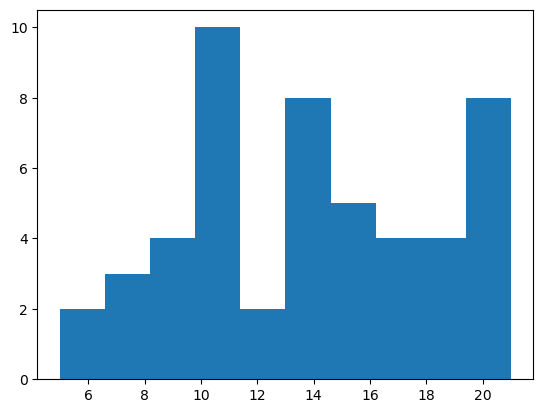

In [84]:
from matplotlib import pyplot as plt
num_trials = 50

trial_results = []

for i in range(num_trials):
    deck = get_new_deck()
    score = play_hand(deck)
    trial_results.append(score)

plt.hist(trial_results)